In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dataport.csv", sep=";")
data.head()

,importateur,jan,fev,mars,avr,mai,juin,juillet,out,sept,oct,nov,dec,nbmarque,nbagenceoff,origine,type
0,ADEV SARL,190,22,285,484,238,19,335,189,240,73,227,45,1,1,asiatique,S
1,AFRIQUE AUTO,385,481,601,491,220,398,488,602,933,214,451,156,2,1,american,S
2,ALPHA FORD,206,271,625,569,1057,980,1187,276,677,905,566,191,1,2,american,S
3,ALPHA HYUNDAI MOTOR,25,22,431,284,400,646,494,540,478,1064,425,73,1,4,asiatique,S
4,ALPHA INTER,23,22,25,28,25,29,68,41,13,14,58,16,2,2,european,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   importateur  19 non-null     object
 1   jan          19 non-null     int64 
 2   fev          19 non-null     int64 
 3   mars         19 non-null     int64 
 4   avr          19 non-null     int64 
 5   mai          19 non-null     int64 
 6   juin         19 non-null     int64 
 7   juillet      19 non-null     int64 
 8   out          19 non-null     int64 
 9   sept         19 non-null     int64 
 10  oct          19 non-null     int64 
 11  nov          19 non-null     int64 
 12  dec          19 non-null     int64 
 13  nbmarque     19 non-null     int64 
 14  nbagenceoff  19 non-null     int64 
 15  origine      19 non-null     object
 16  type         19 non-null     object
dtypes: int64(14), object(3)
memory usage: 2.6+ KB


In [4]:
column_names = ['jan', 'fev', 'mars', 'avr','mai', 'juin', 'juillet', 'out','sept','oct','nov','dec']
data['import_total']= data[column_names].sum(axis=1)
data['import_total']

0      2347
1      5420
2      7510
3      4882
4       362
5     18872
6     16208
7      6033
8      9319
9      3155
10      895
11    11951
12     1957
13      115
14     2361
15     1327
16    16025
17     1716
18    22252
Name: import_total, dtype: int64

In [5]:
data=data.drop(columns = ['importateur','jan', 'fev', 'mars', 'avr','mai', 'juin', 'juillet', 'out','sept','oct','nov','dec'])
data

,nbmarque,nbagenceoff,origine,type,import_total
0,1,1,asiatique,S,2347
1,2,1,american,S,5420
2,1,2,american,S,7510
3,1,4,asiatique,S,4882
4,2,2,european,S,362
5,2,2,european,B,18872
6,2,6,european,B,16208
7,1,7,asiatique,S,6033
8,1,12,asiatique,S,9319
9,1,8,asiatique,S,3155


In [6]:
data.describe(include="all")

,nbmarque,nbagenceoff,origine,type,import_total
count,19.000000,19.000000,19,19,19.000000
unique,NaN,NaN,3,2,NaN
top,NaN,NaN,european,S,NaN
freq,NaN,NaN,9,15,NaN
mean,1.842105,5.000000,NaN,NaN,6984.578947
std,1.118688,4.841946,NaN,NaN,6872.232439
min,1.000000,1.000000,NaN,NaN,115.000000
25%,1.000000,2.000000,NaN,NaN,1836.500000
50%,2.000000,3.000000,NaN,NaN,4882.000000
75%,2.000000,6.500000,NaN,NaN,10635.000000


In [7]:
data.columns

Index(['nbmarque', 'nbagenceoff', 'origine', 'type', 'import_total'], dtype='object')

In [8]:
data_mapped=data.copy()
data_mapped

,nbmarque,nbagenceoff,origine,type,import_total
0,1,1,asiatique,S,2347
1,2,1,american,S,5420
2,1,2,american,S,7510
3,1,4,asiatique,S,4882
4,2,2,european,S,362
5,2,2,european,B,18872
6,2,6,european,B,16208
7,1,7,asiatique,S,6033
8,1,12,asiatique,S,9319
9,1,8,asiatique,S,3155


In [9]:
data_mapped['origine']=data_mapped['origine'].map({'asiatique':0,'american':1,'european':2})
data_mapped['type']=data_mapped['type'].map({'S':0,'B':1})
data_mapped

,nbmarque,nbagenceoff,origine,type,import_total
0,1,1,0,0,2347
1,2,1,1,0,5420
2,1,2,1,0,7510
3,1,4,0,0,4882
4,2,2,2,0,362
5,2,2,2,1,18872
6,2,6,2,1,16208
7,1,7,0,0,6033
8,1,12,0,0,9319
9,1,8,0,0,3155


In [10]:
X = data_mapped.drop(columns=['type'])
y = data_mapped['type']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
 y_test

0     0
5     1
11    0
1     0
Name: type, dtype: int64

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 1.00


In [15]:
import sklearn

sklearn.__version__

'1.0.2'

### Plot Confusion Matrix

C:\Users\jebal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


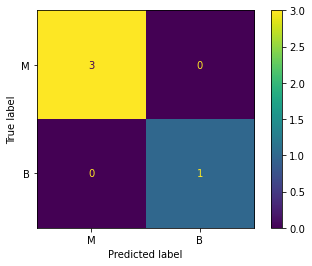

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt,X_test,y_test,display_labels=['M','B'])
plt.show() 

### Classification report

In [17]:
from sklearn.metrics import classification_report
print (classification_report(y_test , y_pred , digits = 6 ))

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000         3
           1   1.000000  1.000000  1.000000         1

    accuracy                       1.000000         4
   macro avg   1.000000  1.000000  1.000000         4
weighted avg   1.000000  1.000000  1.000000         4



In [20]:
print("Making predictions for the following 5 houses:")
print(data_mapped.head(10))
print("The predictions are")
print(dt.predict(X.head(10)))

Making predictions for the following 5 houses:
   nbmarque  nbagenceoff  origine  type  import_total
0         1            1        0     0          2347
1         2            1        1     0          5420
2         1            2        1     0          7510
3         1            4        0     0          4882
4         2            2        2     0           362
5         2            2        2     1         18872
6         2            6        2     1         16208
7         1            7        0     0          6033
8         1           12        0     0          9319
9         1            8        0     0          3155
The predictions are
[0 0 0 0 0 1 1 0 0 0]


### Plot tree

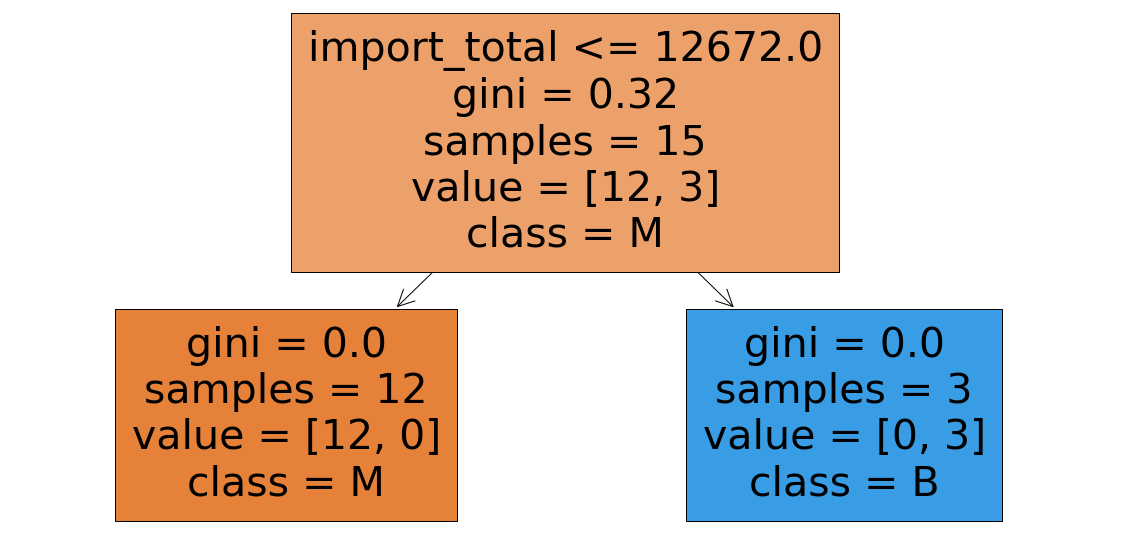

In [21]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt , feature_names=X.columns , class_names=['M' , 'B'] , filled= True)
plt.show()

In [40]:
X.columns
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'] 

### Display decisions

In [41]:
from sklearn.tree import export_text
print(export_text(dt,feature_names= features,show_weights=True ))

|--- concave points_mean <= 0.05
|   |--- radius_worst <= 16.83
|   |   |--- area_se <= 48.70
|   |   |   |--- smoothness_worst <= 0.18
|   |   |   |   |--- smoothness_se <= 0.00
|   |   |   |   |   |--- fractal_dimension_se <= 0.00
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- fractal_dimension_se >  0.00
|   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |--- smoothness_se >  0.00
|   |   |   |   |   |--- texture_worst <= 33.35
|   |   |   |   |   |   |--- weights: [237.00, 0.00] class: 0
|   |   |   |   |   |--- texture_worst >  33.35
|   |   |   |   |   |   |--- weights: [14.00, 1.00] class: 0
|   |   |   |--- smoothness_worst >  0.18
|   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |--- area_se >  48.70
|   |   |   |--- concavity_se <= 0.02
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |--- concavity_se >  0.02
|   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |--- radius_worst >  16

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth= 8 , random_state=1)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [44]:
from sklearn.metrics import accuracy_score
y_pred_entropy= dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
dt_gini = DecisionTreeClassifier(max_depth= 8 , random_state=1)
dt_gini.fit(X_train, y_train)
y_pred_gini= dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print('Accuracy achieved by using entropy: ', accuracy_entropy)
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.956140350877193
Accuracy achieved by using the gini index:  0.9385964912280702
